In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing all necessary scaling and machine learning
from sklearn.model_selection import cross_validate
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



# SKLEARN
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [2]:
data = pd.read_csv('../raw_data/school_dropout_data.csv')
data

,hhid,Gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,read_one_lang,write_one_lang,no_read_write,parents_level_ed,num_per_house,type_housing,automobiles,mobile_phones,satellite,no_water,individual_water_net,electrical_net_co,region,province,Age abandoned school,done_test,work_activity_classified
0,A208004,1.0,1.0,1.0,35.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,5.0,3.0,2.0,1.0,1.0,2,2,1,Marrakech - Tensift - Al Haouz,Essaouira,1.0,1.0,1.0
1,A426002,1.0,1.0,2.0,33.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,5.0,3.0,2.0,1.0,2.0,2,2,1,Marrakech - Tensift - Al Haouz,Essaouira,1.0,2.0,0.0
2,A268006,1.0,1.0,1.0,31.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,7.0,2.0,2.0,1.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,Chichaoua,1.0,1.0,0.0
3,A419004,1.0,2.0,2.0,62.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,6.0,1.0,2.0,1.0,1.0,2,2,1,Sous - Massa - Draa,Taroudant,1.0,2.0,0.0
4,A536006,1.0,2.0,1.0,36.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0,3.0,2.0,1.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,Essaouira,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,A618007,1.0,1.0,1.0,37.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,5.0,2.0,2.0,1.0,2.0,2,2,1,Marrakech - Tensift - Al Haouz,El Kelaa Des Sraghna,1.0,1.0,0.0
4048,A571001,1.0,1.0,1.0,37.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,7.0,3.0,2.0,2.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,El Kelaa Des Sraghna,1.0,1.0,0.0
4049,A359007,1.0,1.0,2.0,42.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,El Kelaa Des Sraghna,0.0,1.0,0.0
4050,A578003,1.0,2.0,1.0,50.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,10.0,1.0,2.0,2.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,El Kelaa Des Sraghna,0.0,1.0,0.0


In [3]:
data.duplicated().sum()

0

In [4]:
data.describe()

,Gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,read_one_lang,write_one_lang,no_read_write,parents_level_ed,num_per_house,type_housing,automobiles,mobile_phones,satellite,no_water,individual_water_net,electrical_net_co,Age abandoned school,done_test,work_activity_classified
count,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000,4052.000000
mean,1.016535,1.416832,1.608379,45.735213,1.056515,1.165842,1.866089,1.974257,1.233168,1.729614,1.752014,1.271652,1.508391,6.731984,2.238401,1.955084,1.341066,1.685834,1.997285,1.834156,1.428677,0.747532,1.259131,0.537512
std,0.127537,0.491633,0.484181,9.528661,0.399351,0.371433,0.340094,0.158151,0.422274,0.439198,0.427612,0.440453,0.921602,1.996352,1.029760,0.207145,0.474126,0.464240,0.052039,0.371986,0.494948,0.434482,0.438212,0.681834
min,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,39.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.752014,1.000000,1.000000,5.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,45.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,7.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,2.000000,2.000000,51.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,8.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,96.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,22.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000


In [5]:
data = data.drop('done_test', axis = 1)

In [6]:
data.dtypes

hhid                         object
Gender                      float64
mother_alive                float64
father_alive                float64
parents_age                 float64
marital_status              float64
darija                      float64
class_arabic                float64
french                      float64
amazygh                     float64
read_one_lang               float64
write_one_lang              float64
no_read_write               float64
parents_level_ed            float64
num_per_house               float64
type_housing                float64
automobiles                 float64
mobile_phones               float64
satellite                   float64
no_water                      int64
individual_water_net          int64
electrical_net_co             int64
region                       object
province                     object
Age abandoned school        float64
work_activity_classified    float64
dtype: object

In [7]:
data.shape

(4052, 26)

In [8]:
data.shape

(4052, 26)

# Spliting Data into training and test

In [9]:
X = data.drop('Age abandoned school', axis=1)
y = data['Age abandoned school']

In [10]:
y.value_counts()

1.0    3029
0.0    1023
Name: Age abandoned school, dtype: int64

In [11]:
X.shape

(4052, 25)

In [12]:
y.shape

(4052,)

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3241, 25), (811, 25), (3241,), (811,))

In [14]:
X_train.duplicated().sum()

0

In [15]:
X_train.duplicated().sum(), X_test.duplicated().sum(), y_train.duplicated().sum(), y_test.duplicated().sum()

(0, 0, 3239, 809)

# Selecting categorical and numerical features

In [16]:
X_train_num = X.select_dtypes(include=["float64","int64"])
X_train_cat = X[["region","province"]]

In [17]:
X_train_cat.duplicated().sum()

4035

# Creating Pipeline

In [18]:
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('standard_scaler', StandardScaler())]
)

In [19]:
cat_transformer = Pipeline([
    ('one_hot_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [20]:
preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, X_train_num.columns),
    ('cat_transformer', cat_transformer, X_train_cat.columns)])

preprocessor

ColumnTransformer(transformers=[('num_transformer',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 Index(['Gender', 'mother_alive', 'father_alive', 'parents_age', 'marital_status', 'darija', 'class_arabic', 'french', 'amazygh', 'read_one_lang', 'write_one_lang', 'no_read_write', 'parents_level_ed', 'num_per_house', 'type_housing', 'automobiles', 'mobile_phones', 'satellite', 'no_water', 'individual_water_net', 'electrical_net_co', 'work_activity_classified'], dtype='object')),
                                ('cat_transformer',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['region', 'province'], dtype='object'))])

In [21]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_train_preprocessed

array([[-0.12644153,  1.18494449,  0.80335534, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12644153, -0.84863303, -1.26473935, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12644153, -0.84863303, -1.26473935, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.12644153,  1.18494449,  0.80335534, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12644153,  1.18494449, -1.26473935, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12644153, -0.84863303,  0.80335534, ...,  0.        ,
         0.        ,  0.        ]])

In [22]:
X_test_preprocessed = preprocessor.fit_transform(X_test)
X_test_preprocessed

array([[-0.14186538,  1.19189805,  0.83144517, ...,  0.        ,
         1.        ,  0.        ],
       [-0.14186538, -0.84525968,  0.83144517, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14186538, -0.84525968,  0.83144517, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.14186538,  1.19189805,  0.83144517, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14186538, -0.84525968, -1.2251418 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.14186538, -0.84525968,  0.83144517, ...,  0.        ,
         0.        ,  0.        ]])

In [23]:
feature_names = preprocessor.named_transformers_['cat_transformer']\
    .named_steps['one_hot_encoder'].get_feature_names_out(X_train_cat.columns)


X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=list(X_train_num.columns) + list(feature_names))
X_train_preprocessed_df

,Gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,read_one_lang,write_one_lang,no_read_write,parents_level_ed,num_per_house,type_housing,automobiles,mobile_phones,satellite,no_water,individual_water_net,electrical_net_co,work_activity_classified,region_L'Oriental,region_Marrakech - Tensift - Al Haouz,region_Meknhs - Tafilalet,region_Sous - Massa - Draa,region_Tadla - Azilal,province_Al Haouz,province_Azilal,province_Chichaoua,province_Chtouka Ait Baha,province_El Hajeb,province_El Kelaa Des Sraghna,province_Errachidia,province_Essaouira,province_Ifrane,province_Jerada,province_Khenifra,province_Meknes,province_Nador,province_Ouarzazate,province_Taourirt,province_Taroudant,province_Tiznit
0,-0.126442,1.184944,0.803355,1.677567,-0.144411,2.245716,0.393603,0.154500,-0.552297,0.606184,0.574851,-0.607291,-0.547898,1.640105,0.737504,0.218746,-0.731139,-1.487310,0.043066,0.452090,-0.881399,-0.783747,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.126442,-0.848633,-1.264739,-0.294839,-0.144411,-0.446808,0.393603,0.154500,-0.552297,0.606184,0.574851,-0.607291,-0.547898,-0.359925,0.737504,0.218746,-0.731139,0.672355,0.043066,0.452090,-0.881399,-0.783747,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.126442,-0.848633,-1.264739,-0.813893,-0.144411,-0.446808,-2.549294,0.154500,1.816786,-1.687706,-1.774953,1.680324,1.688548,-1.359940,-1.201060,0.218746,-0.731139,0.672355,0.043066,-2.211951,-0.881399,0.689643,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.126442,-0.848633,-1.264739,0.120405,-0.144411,-0.446808,-2.549294,0.154500,1.816786,-1.687706,-1.774953,1.680324,1.688548,2.140112,-0.231778,0.218746,-0.731139,-1.487310,0.043066,0.452090,-0.881399,-0.783747,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.126442,-0.848633,-1.264739,-1.332947,-0.144411,2.245716,0.393603,0.154500,-0.552297,-1.687706,-1.774953,1.680324,1.688548,-0.359925,0.737504,0.218746,-0.731139,0.672355,0.043066,0.452090,1.134560,-0.783747,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,-0.126442,-0.848633,-1.264739,-0.191028,-0.144411,-0.446808,0.393603,0.154500,-0.552297,0.606184,0.574851,-0.607291,-0.547898,-0.359925,-1.201060,0.218746,1.367729,0.672355,0.043066,0.452090,-0.881399,-0.783747,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3237,7.908794,-0.848633,-1.264739,-0.191028,4.756487,2.245716,0.393603,0.154500,-0.552297,0.606184,0.574851,-0.607291,-0.547898,0.140082,-1.201060,0.218746,1.367729,0.672355,0.043066,0.452090,1.134560,2.163033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3238,-0.126442,1.184944,0.803355,1.366134,-0.144411,2.245716,0.393603,0.154500,-0.552297,0.606184,0.574851,-0.607291,-0.547898,2.140112,-1.201060,0.218746,1.367729,0.672355,0.043066,0.452090,1.134560,-0.783747,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3239,-0.126442,1.184944,-1.264739,0.847080,-0.144411,-0.446808,-2.549294,-6.496857,1.816786,-1.687706,0.574851,1.680324,3.924993,-0.859933,-1.201060,-4.571504,-0.731139,0.672355,0.043066,0.452090,-0.881399,-0.783747,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Testing MLPClassifier

In [24]:
model_mlp = MLPClassifier(max_iter=100)
model_mlp.fit(X_train_preprocessed, y_train)

/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100)

In [25]:
y_pred_mlp = model_mlp.predict(X_test_preprocessed)
y_pred_mlp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [26]:
def perform(y_true, y_pred):
    print("Precision : ", precision_score(y_true, y_pred))
    print("Recall : ", recall_score(y_true, y_pred))
    print("Accuracy : ", accuracy_score(y_true, y_pred))
    print("F1 Score : ", f1_score(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_true, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

Precision :  0.7566844919786097
Recall :  0.9248366013071896
Accuracy :  0.718865598027127
F1 Score :  0.8323529411764707

 [[ 17 182]
 [ 46 566]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.27      0.09      0.13       199
         1.0       0.76      0.92      0.83       612

    accuracy                           0.72       811
   macro avg       0.51      0.51      0.48       811
weighted avg       0.64      0.72      0.66       811

******************************************************



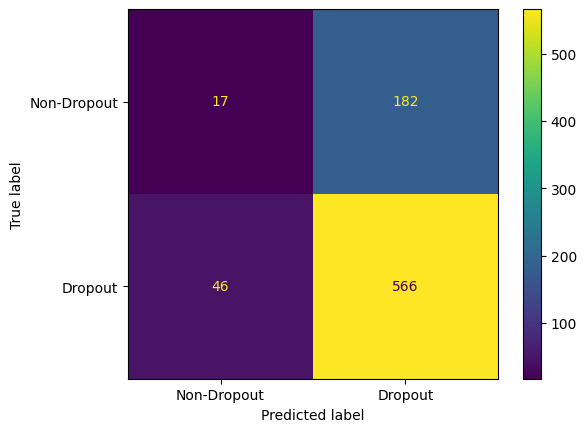

In [27]:
perform(y_test, y_pred_mlp)

In [28]:
parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [29]:
new_model_mlp = MLPClassifier(max_iter=100)

In [30]:
clf = GridSearchCV(model_mlp, parameters, n_jobs=-1, cv=3)

In [31]:
clf.fit(X_train_preprocessed, y_train)

/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: Converg

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [32]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


In [33]:
best_model_params = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive', solver='sgd')

In [34]:
best_model_params.fit(X_train_preprocessed, y_train)

/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive',
              solver='sgd')

In [35]:
y_pred = best_model_params.predict(X_test_preprocessed)

Precision :  0.7546239210850801
Recall :  1.0
Accuracy :  0.7546239210850801
F1 Score :  0.8601546029515108

 [[  0 199]
 [  0 612]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       199
         1.0       0.75      1.00      0.86       612

    accuracy                           0.75       811
   macro avg       0.38      0.50      0.43       811
weighted avg       0.57      0.75      0.65       811

******************************************************



/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

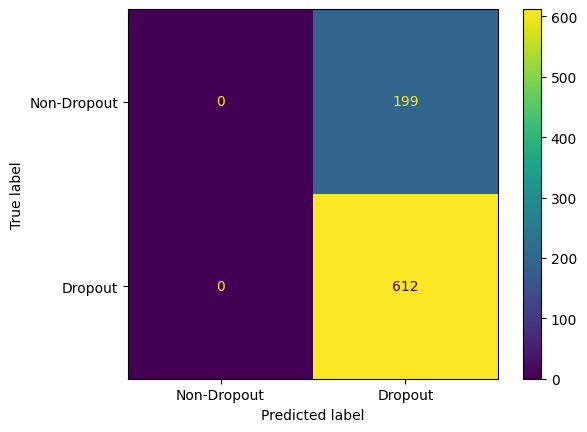

In [36]:
perform(y_test, y_pred)

# Testing KNeighborsClassifier

In [37]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_preprocessed,y_train)
    pred_i = knn.predict(X_test_preprocessed)
    error_rate.append(np.mean(pred_i != y_test))
error_rate

[0.3908754623921085,
 0.46115906288532676,
 0.31442663378545005,
 0.374845869297164,
 0.2909987669543773,
 0.32305795314426633,
 0.2749691738594328,
 0.2996300863131936,
 0.2688039457459926,
 0.2996300863131936,
 0.2638717632552404,
 0.2762022194821208,
 0.2589395807644883,
 0.2725030826140567,
 0.24907521578298397,
 0.2589395807644883,
 0.25400739827373614,
 0.2601726263871763,
 0.24784217016029594,
 0.2527743526510481,
 0.24907521578298397,
 0.25154130702836003,
 0.24907521578298397,
 0.2527743526510481,
 0.24784217016029594,
 0.24907521578298397,
 0.24537607891491986,
 0.24537607891491986,
 0.2466091245376079,
 0.2466091245376079,
 0.24537607891491986,
 0.2466091245376079,
 0.2466091245376079,
 0.2466091245376079,
 0.2466091245376079,
 0.2466091245376079,
 0.24537607891491986,
 0.24537607891491986,
 0.24537607891491986]

 Minimum error: 0.24537607891491986 at K = 27


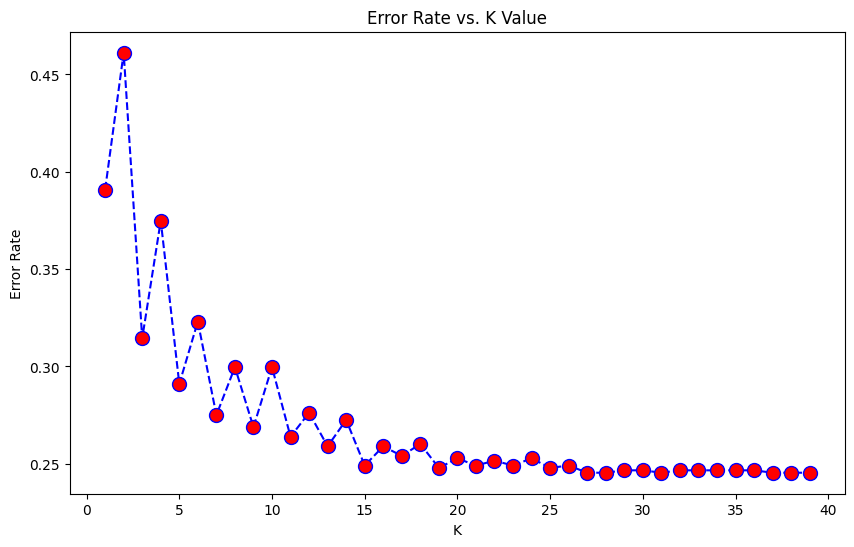

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate)) + 1
print(f' Minimum error: {min(error_rate)} at K = {req_k_value}')

In [39]:
model_kn = KNeighborsClassifier(n_neighbors = req_k_value, metric='minkowski', p=2)
model_kn.fit(X_train_preprocessed, y_train)

KNeighborsClassifier(n_neighbors=27)

In [40]:
y_pred_kn = model_kn.predict(X_test_preprocessed)
y_pred_kn

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Precision :  0.7558859975216853
Recall :  0.9967320261437909
Accuracy :  0.7546239210850801
F1 Score :  0.8597603946441156

 [[  2 197]
 [  2 610]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.50      0.01      0.02       199
         1.0       0.76      1.00      0.86       612

    accuracy                           0.75       811
   macro avg       0.63      0.50      0.44       811
weighted avg       0.69      0.75      0.65       811

******************************************************



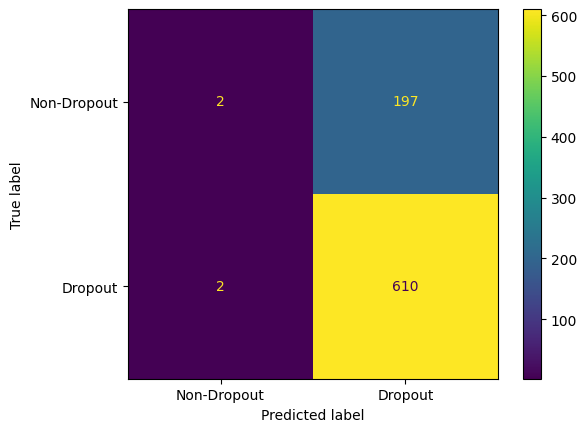

In [41]:
perform(y_test, y_pred_kn)

In [42]:
# X_num = X.select_dtypes(include=["float64","int64"])
# X_cat = X[["region","province"]]

In [43]:
# cat_preprocessor = make_pipeline(
#     OneHotEncoder(sparse_output = False, handle_unknown='ignore')
# )

In [44]:
# num_processor = make_pipeline(
#     MinMaxScaler()
# )

In [45]:
# preprocessor = ColumnTransformer([
#     ('cat_pipeline', cat_preprocessor, X_cat.columns),
#     ('num_pipline', num_processor, X_num.columns),
# ], remainder='drop').set_output(transform='pandas')

In [46]:
# preprocessor

In [47]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [48]:
# preprocessor.fit_transform(X_train)

In [49]:
X_test_preprocessed

array([[-0.14186538,  1.19189805,  0.83144517, ...,  0.        ,
         1.        ,  0.        ],
       [-0.14186538, -0.84525968,  0.83144517, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14186538, -0.84525968,  0.83144517, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.14186538,  1.19189805,  0.83144517, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14186538, -0.84525968, -1.2251418 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.14186538, -0.84525968,  0.83144517, ...,  0.        ,
         0.        ,  0.        ]])

In [50]:
X_train_preprocessed

array([[-0.12644153,  1.18494449,  0.80335534, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12644153, -0.84863303, -1.26473935, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12644153, -0.84863303, -1.26473935, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.12644153,  1.18494449,  0.80335534, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12644153,  1.18494449, -1.26473935, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12644153, -0.84863303,  0.80335534, ...,  0.        ,
         0.        ,  0.        ]])

# Testing CatBoostClassifier

In [51]:
from catboost import CatBoostClassifier

In [52]:
catmodel = CatBoostClassifier(
    iterations=500,
    custom_loss=['Precision', 'Recall', 'F1', 'Accuracy'], 
    random_seed=42,
    auto_class_weights='Balanced', 
)

In [53]:
catmodel.fit(
    X_train_preprocessed, y_train, 
    eval_set=(X_test_preprocessed, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [54]:
y_pred_cat = catmodel.predict(X_test_preprocessed)
y_pred_cat

array([1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0.

Precision :  0.8229166666666666
Recall :  0.5163398692810458
Accuracy :  0.5511713933415536
F1 Score :  0.6345381526104418

 [[131  68]
 [296 316]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.31      0.66      0.42       199
         1.0       0.82      0.52      0.63       612

    accuracy                           0.55       811
   macro avg       0.56      0.59      0.53       811
weighted avg       0.70      0.55      0.58       811

******************************************************



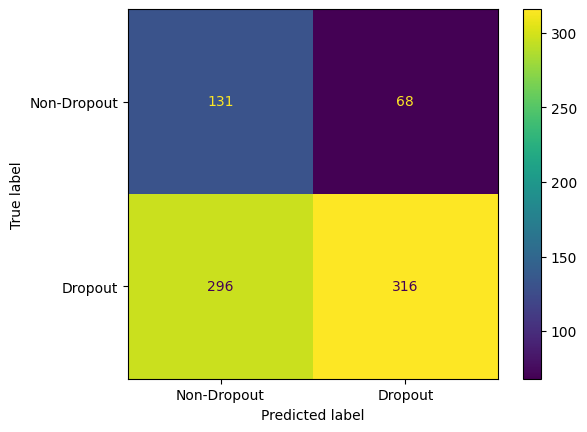

In [55]:
perform(y_test, y_pred_cat)